In [ ]:
#| output: false
#| echo: false

%load_ext pycodestyle_magic
%pycodestyle_on

The Municipality is worried that the canal and support boats might pollute the air with their diesel engines.
Since the Municipality wants to create ideal conditions for the swimmers so that they can set records, we need to see if their concern is warranted and what should or could be done to improve conditions.
Amsterdam also wants to advertise this event as a Neutral Energy Event (NEE).

Here we list some **key information** in regards to how we tackled the problem of planning such event. The following chart presents the key elements to know, their **sources** and their **formats**.

| # | Parameter | Summary | Source | Format|
|:--|:----------|:------------|:-------|:------|
|1. | Quantity of diesel/fossil fuel boats vs electric | -550 canal boats (commercial), 75% emissions free (2020) these boats are used a lot, each boat up to 14 hours per day; 12,000 recreational boats, 5% emissions free (2020)  | [Article](https://www.reuters.com/article/us-climate-change-netherlands-idUSKBN20Q1W7 ) | Article |
|2. | Estimation of electric boats by May 2024 | Originally from 1 Jan 2025, only electric boats will be allowed in Amsterdam’s canals, except the throughway. The deadline has been extended for pleasure boats due to complaints about insufficient charging infrastructure, which have been delayed due to pandemic. Currently 400-500 yachts have switched to electric, but there are only 24 16A shore power outlets. | [Gemeente](https://www.amsterdam.nl/en/traffic-transport/boating/emission-free-zone/) [Article](https://www.yachtingart.com/2023/06/2025-total-ban-on-thermal-boats-in-amsterdam.html) | Article |
|3. | Weather forecasts | For correlation of usage of vessels| [Platform](https://www.tudelft.nl/en/ewi/over-de-faculteit/afdelingen/electrical-sustainable-energy/photovoltaic-materials-and-devices/dutch-pv-portal/meteorological-data) | Data Platform |
|4. |Energy usage & carbon footprint of canal boats| -6 k/h max; | [Study](https://www.waternet.nl/siteassets/innovatie/maritime-envorimental-performance-indiocators-for-urban-waterways-in-amsterdam.pdf) | Paper |
|5. |Cost of converting boats to electric| Building new electric canal boat: 1m euros; Converting existing canal boat to electrical: 50,000 euros; Converting recreational boats to electrical: 4,000 – 40,000 euros depending on size; nstallation chargers: 100 boat charging stations installed by end 2021 + floating charging station by Skoon Energy to help with grid balancing | [Article](https://www.reuters.com/article/us-climate-change-netherlands-idUSKBN20Q1W7) | JSON
: {tbl-colwidths="[5,20,40,15,10]"}

## Minimising exposure to pollution from diesel/fossil fuel driven boats


### No. of diesel/fossil fuel driven canal boats

As of 2020, there are about 12 550 boats in the canals of Amsterdam, approximately 550 of which are commercial boats, the remaining 12000 are recreational boats. 
Of the commercial fleet about 75% is emission free, while for recreational boats this percentage is only 5%. [@sterling_amsterdams_2020]

Type         | No. of boats | % of boats that are emission free
-------------|-------:|-----------------:
Commercial   | 550   | 75
Recreational | 12550 | 5

In [ ]:
com_boats = 550
rec_boats = 12550
perc_com_boats_emission_free = 75
perc_rec_boats_emission_free = 5

com_boats_emission_free = com_boats * (perc_com_boats_emission_free/100)
rec_boats_emission_free = rec_boats * (perc_rec_boats_emission_free/100)

boats_emission_free = com_boats_emission_free + rec_boats_emission_free
boats_emission = com_boats + rec_boats - boats_emission_free

print("The number of emission free boats is", int(boats_emission_free))
print("The number of  boats with emission is", int(boats_emission))

### Peak times for canal boats

To create ideal conditions for the swimmers, we look towards hosting the event outside of ‘rush hours’ on the canals, to minimise impact of pollution from boats.
This would also help ensure the continuity of boat traffic. 

As can be seen in the figure below [@snelder_op_2013] (no raw data available), the busiest hours on the water usually start around 15:00.
For that reason the swimming event should be finished before 15:00.

![image](images/canal-traffic-by-time-of-day.png)


To determine the ideal start time of the race, we consider the following:

1. People swim at speeds of about 8 km/h. [@thornton_speed_2019]
1. Required length of the swim route is 5km.
1. For safety reasons, each wave of swimmers should have a maximum of 120 swimmers in the group. [@british_triathlon_open_nodate]
1. We plan for around 3000 swimmers for the swim meet, similar to the Amsterdam City Swim. [@amsterdam_city_swim_swim_nodate]

In [ ]:
LENGTH_OF_ROUTE = 5000  # in meters
NUM_SWIMMERS_PER_WAVE = 120
num_swimmers = 3000
speed_swimmers_kmh = 8
time_between_waves = 20  # minutes

#  save variable so it can be accessed from other notebooks
%store LENGTH_OF_ROUTE
%store num_swimmers
%store NUM_SWIMMERS_PER_WAVE
%store speed_swimmers_kmh

speed_swimmers_ms = speed_swimmers_kmh * 1000 / (60*60)
num_waves = num_swimmers / NUM_SWIMMERS_PER_WAVE
sec_per_wave = LENGTH_OF_ROUTE / speed_swimmers_ms
min_per_wave = sec_per_wave / 60
duration_swim_min = min_per_wave + (num_waves * time_between_waves)
duration_swim_hours = duration_swim_min / 60
end_time = 15.00
start_time = end_time - duration_swim_hours

print("The start time for the first wave of swimmers is",
      int(start_time),":00")

Stored 'NUM_SWIMMERS_PER_WAVE' (int)
Stored 'LENGTH_OF_ROUTE' (int)


Thus, the first wave of the race starts at 6:00 am with a next wave going every 20 minutes, this way the last wave will be out of the water by 15:00.

## Energy use of boats

### Energy requirements for canal boats in general

#### Energy use of canal boats compared to driving a car

Let's say 10 boats are needed to assist in the city swim, we can calculate how many car-kM's could be driven as equivalent to the power usage of boats. [@e-drivers_2020] [@whiltonmarina_2023]

In [ ]:
yearly_car_consumption_kWh = 7700
hours_boat_race = 9
boat_diesel_usage = 1  # litre per hour
num_boats = 10
energy_density_diesel = 45  # MJ/kg
conversion_rate_MJ_kWh = 0.277778  # 1 MJ = 0.277778 kWh
weight_diesel = 0.84  # kg

kilos_diesel_used = num_boats*boat_diesel_usage*weight_diesel*hours_boat_race
energy_use_boats = kilos_diesel_used*energy_density_diesel*conversion_rate_MJ_kWh
num_days_car_equivalent = 365/yearly_car_consumption_kWh*energy_use_boats

# print(liters_diesel_used)
# print(energy_use_boats)
print("The energy use of 10 boats during the city swim is equal to the \
      average car energy consumption in",num_days_car_equivalent,"days.")

#### Economic feasibility of switching canal boats to clean energy

Cost of converting boats to electric:
    -   Building new electric canal boat: 1m euros;
    -   Converting existing canal boat to electrical: 50,000 euros;
    -   Converting recreational boats to electrical: 4,000 – 40,000 euros depending on size; 
    -   Installation chargers: 100 boat charging stations installed by end 2021 + floating charging station by   Skoon Energy to help with grid balancing

The feasibility of electrifying the entire fleet of Amsterdam is completely reliant on the willingness of businesses, private owners and the municipality to invest these amounts of money. 

[Article](https://www.reuters.com/article/us-climate-change-netherlands-idUSKBN20Q1W7)

### Energy requirements for support boats for the event

#### Number of support boats required

Drawing on other event data, here we list **guidelines and recommendations** taken by other organizers in Open Swimming competitions worldwide.

| # | Parameter | Summary | Source | Format|
|:--|:----------|:------------|:-------|:------|
|1. | Open Water Swimming Manual 2022 | “There must be sufficient safety craft or escort craft located on the course to immediately recognize when a swimmer is in distress and to initiate an immediate rescue response after observation or notification that a swimmer's rescue is required. | [Manual](https://resources.fina.org/fina/document/2022/04/27/1b20b7df-dd6c-488b-a147-51eae83a1590/FINA-OW-MANUAL-2022.pdf) | Manual |
|2. | Open Water Swimming Manual 2022 | there should also be stationary safety craft located every 400 meters along the course, with a CPR- and life support-trained responder on board |  [Manual](https://resources.fina.org/fina/document/2022/04/27/1b20b7df-dd6c-488b-a147-51eae83a1590/FINA-OW-MANUAL-2022.pdf) | Manual |
|3. | British Triathlon Open Water Swiming Safety Guidelines | “Safety cover, safety craft and / or canoes must be provided on the water. Personnel assigned to water safety must be in the ratio of 1 to, at most, every 20 competitors. Emergency exit points should be available for swimmers to leave the water and separate exit points should be available for safety craft.” | [Guidelines](https://www.triathlonscotland.org/files/British-Triathlon-Open-Water-Swimming-Safety-Guidelines-08.pdf) | Guidelines |
: {tbl-colwidths="[5,20,40,15,10]"}


The safety of all swimmers must be ensured during the whole duration of the race. During the event safety measures consist of:

-	Lifeguards in canoes;

    As advised by the Open Water Swimming Safety Guide for Multi-Sport Events from the British Triathlon organisation boats should be in the water to be able to rescue swimmers in distress. 
A ratio of a minimum of one boat per twenty swimmers is advised in waters where shorelines are easily reachable. 
A swimmer should also always be within 50 meters range of a lifeguard. [@british_triathlon_open_nodate] 
Since most of the chosen route goes through canals it is deemed unsafe to have boats sailing so close alongside the swimmers. 
For that reason, lifeguards will be present every 50 meters in canoes instead of on boats.
 
    This also contributes to the sustainability of the event. As mentioned previously, diesel engine boats are highly polluting and the resultant water toxicity can remain in the water for up to 14 days after the use of boats [@JUTTNER19951976], so no fossil fuel boats should be used as support boats.
-   Safety platforms in the water;

    To make sure distressed swimmers can easily leave the water platforms are placed every 100m alongside the swimming route where quay walls make exiting the water difficult.

In [ ]:
MAX_DISTANCE_BETWEEN_LIFEGUARDS = 50
NUM_SWIMMERS_PER_SUPPORT_BOAT = 20
# Retrieve variables stored in other notebooks
%store -r NUM_SWIMMERS_PER_WAVE
%store -r LENGTH_OF_ROUTE

num_boats_required = NUM_SWIMMERS_PER_WAVE / NUM_SWIMMERS_PER_SUPPORT_BOAT
num_lifeguards_required = LENGTH_OF_ROUTE / MAX_DISTANCE_BETWEEN_LIFEGUARDS
num_lifeguard_canoes_required = max(num_boats_required, num_lifeguards_required)

print("No. of lifeguard canoes required = max({}, {}) = {}".
      format(num_boats_required, num_lifeguards_required,
             num_lifeguard_canoes_required))

No. of lifeguard canoes required = max(6.0, 100.0) = 100.0


Knowing that canals are too narrow for boats to navigate safely with swimmers around, lifeguards alongside the canals, along with platforms every 100m where quay walls are steep would suffice. 

#### Energy requirements for support boats

100 canoes are used for the safety of swimmers, by using canoes instead of electric boats a lot of greenhouse gas emission is prevented. If we were to use electric boats electricity would have been used. Exactly how much energy we are saving by using canoes is calculated below.

In [ ]:
num_canoes = 100
power_boat_kwh = 20
time_race = 7

power_use = num_canoes * power_boat_kwh * time_race
print('Reduced power use of boats:', power_use, 'kWh')

Used power by boats: 14000 kWh


#### Solar panels required

Assuming that solar panels would be rented and installed for a week to power the boats the amount of solar panels needed is calculated below. Numbers about efficiency of solar panels are found at [@Voltasolar_2023].

In [ ]:
wp_sp = 365
kWh_year = wp_sp * 0.85
kWh_week = kWh_year / 52
sp_needed = power_use / kWh_week
print('Number of solar panels needed:', int(sp_needed) + 1)

Number of solar panels needed: 2347


If the city were to actually use electrified boats the solar panels that are needed to harvest the energy could be placed on the water. [@floatingsolar] has a circular system that floats. The size of the floating solar field is calculated below.

In [ ]:
import math

area_circle = 2347.0 * 1.65
# surface = 3.14 * r^2
r = math.sqrt(area_circle / 3.14)
diameter = 2 * r

print("The diameter of the floating solar panels is", diameter, "m")

The circle needs to have a diameter of about 70m, this fits in the water close to the marine terrain as shown on the picture below.

![diameter solar.JPG](<attachment:diameter solar.JPG>)
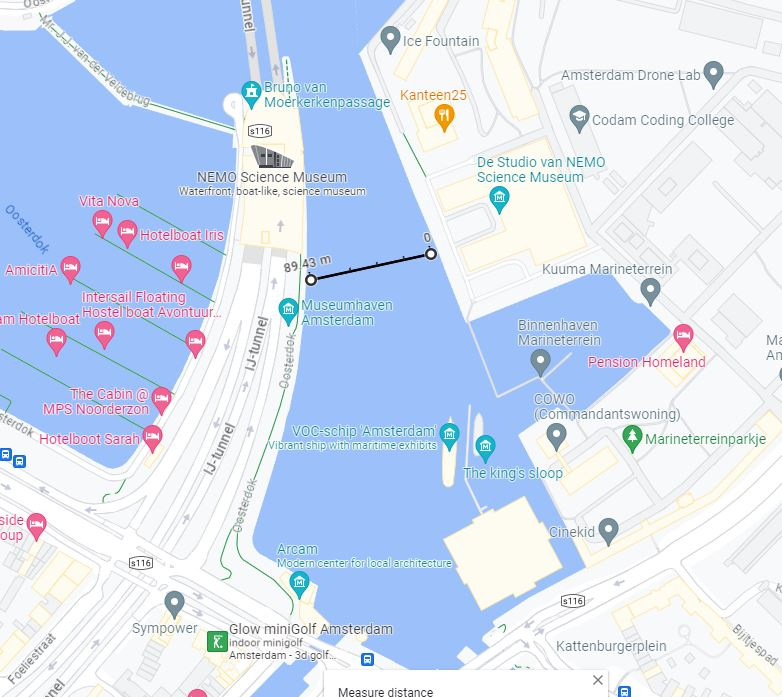

## Pollution impact of boats



Due to the lack of exhaust gas treatment systems in boat engines, as found in all modern car engines, a modern 5 horsepower 4-stroke outboard engine can be as polluting as 39 passenger cars driving at 95 km/h. [@propel_why_2022]
While we do not know the detailed relationship between boat traffic and water quality, we do know that water toxicity as a result of fossil fuelled boats can stay present up to 14 days after the use of boats [@JUTTNER19951976].

As such, water quality should improve if there are fewer or no canal boats using fossil fuels for at least two weeks prior to the event.

## Conclusion

The swim meet is proposed to be conducted from 06:00 to 15:00 pm, with the following route:

![Route 3](images/Ams%20Canal%20Speeds-Layout1-16.jpg)
